In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error as MSE, log_loss,r2_score
import warnings
warnings.filterwarnings('ignore')



In [ ]:
DATA_PATH = "/kaggle/input/water-quality-dataset/waterPollution.csv"


In [ ]:
data = pd.read_csv("/content/waterPollution.csv")

In [ ]:
data.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [ ]:
data.isna().sum()

,0
parameterWaterBodyCategory,0
observedPropertyDeterminandCode,0
procedureAnalysedFraction,0
procedureAnalysedMedia,0
resultUom,0
phenomenonTimeReferenceYear,0
parameterSamplingPeriod,0
resultMeanValue,0
waterBodyIdentifier,0
Country,104


In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
columns = ("parameterWaterBodyCategory","observedPropertyDeterminandCode","procedureAnalysedFraction","procedureAnalysedMedia","resultUom","parameterSamplingPeriod","waterBodyIdentifier","Country")
for i in columns:
  le = LabelEncoder()
  data[i] = le.fit_transform(data[i])

In [ ]:
model = KNeighborsClassifier()
x = data.drop(["resultMeanValue"],axis = 1)
y = data["resultMeanValue"].values

<Axes: >

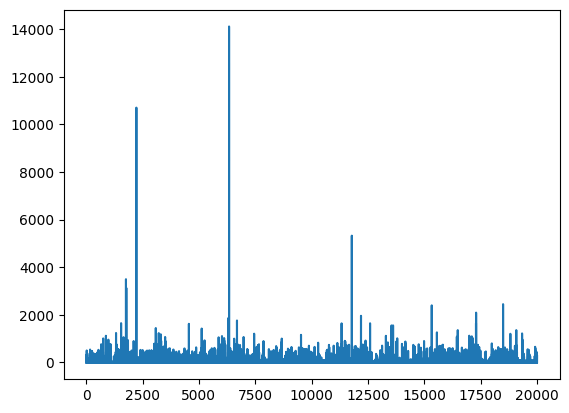

In [ ]:
data["resultMeanValue"].plot()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [ ]:
def makeClass(y):
  y = ["Dirty" if x > 500 else "Clean" for x in y]
  return y

In [ ]:
y_train, y_test = makeClass(y_train),makeClass(y_test)


In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(x_train)
y_test = scaler.fit_transform(x_test)

In [ ]:
def fitData(x,y,model,columns):
  a = x[columns]
  x_train,x_test,y_train,y_test = train_test_split(a,y,test_size = 0.3,random_state=42)
  y_train, y_test = makeClass(y_train),makeClass(y_test)
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.fit_transform(x_test)
  model.fit(x_train,y_train)
  return model.score(x_test,y_test)

In [ ]:
usedCols = list()
scores = list()
for col in x.columns:
  usedCols.append(col)
  score = fitData(x,y,model,usedCols)
  scores.append(score)
  print(f"Accuracy with {col} Feature: {score}")
  print("-"*65)

Accuracy with parameterWaterBodyCategory Feature: 0.9867627345844504
-----------------------------------------------------------------
Accuracy with observedPropertyDeterminandCode Feature: 0.9740281501340483
-----------------------------------------------------------------
Accuracy with procedureAnalysedFraction Feature: 0.9874329758713136
-----------------------------------------------------------------
Accuracy with procedureAnalysedMedia Feature: 0.9874329758713136
-----------------------------------------------------------------
Accuracy with resultUom Feature: 0.9874329758713136
-----------------------------------------------------------------
Accuracy with phenomenonTimeReferenceYear Feature: 0.9870978552278821
-----------------------------------------------------------------
Accuracy with parameterSamplingPeriod Feature: 0.9874329758713136
-----------------------------------------------------------------
Accuracy with waterBodyIdentifier Feature: 0.9865951742627346
------------

In [ ]:
regressor = xg.XGBRegressor()\
            .fit(x_train,y_train)

In [ ]:
preds = regressor.predict(x_test)

In [ ]:
preds

array([[9.9999851e-01, 9.3371207e-01, 9.9999923e-01, ..., 5.3822705e-06,
        4.7955341e-06, 4.5676669e-01],
       [9.9999851e-01, 9.2268145e-01, 9.9999923e-01, ..., 5.3822705e-06,
        5.0327837e-01, 6.7154270e-01],
       [4.8523303e-05, 8.0949807e-01, 9.9999923e-01, ..., 1.1621024e-01,
        4.7955341e-06, 3.4163260e-01],
       ...,
       [9.9999851e-01, 8.6188263e-01, 9.9999923e-01, ..., 5.3822705e-06,
        4.7955341e-06, 4.5676669e-01],
       [9.9999851e-01, 9.0599549e-01, 9.9999923e-01, ..., 5.3822705e-06,
        4.7955341e-06, 9.9995947e-01],
       [9.9999851e-01, 9.0599549e-01, 9.9999923e-01, ..., 4.4159371e-01,
        8.8630609e-02, 5.6277186e-01]], dtype=float32)

In [ ]:
mse = MSE(y_test,preds)
r2Score = r2_score(y_test,preds)


In [ ]:
print("Metrics for XGBoost Regressor")
print(f"MSE: {mse}\nRMSE: {mse ** (1/2)}\nR^2 Score: {r2Score}")

Metrics for XGBoost Regressor
MSE: 4.0221005550228205e-05
RMSE: 0.006342003275797656
R^2 Score: 0.9954628127662196


In [21]:
# prompt: import r2

from sklearn.metrics import r2_score

# Assuming 'y_test' and 'preds' are already defined from the previous code
r2 = r2_score(y_test, preds)
print(f"R^2 score: {r2}")

R^2 score: 0.9954628127662196


In [22]:
import pickle

In [25]:
pickle.dump(regressor,open('model.pkl','wb'))